![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `4` (27 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Docstring**

In [2]:
# help(FormatEddyProFluxnetFileForUpload)

</br>

# **Input and output folders**

In [3]:
SOURCE = r"..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple"  # This is the folder where datafiles are searched
OUTDIR = r"F:\TMP"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    sourcedir=SOURCE,
    outdir=OUTDIR,
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple
    output folder: F:\TMP
    add run ID: True


## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO-FLUXNET-CSV-30MIN files with extension .csv andID _fluxnet_ in folder ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple ...
    Found 3 files:
   --> ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240818-090003_fluxnet_2024-08-18T090018_adv.csv
   --> ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240819-090003_fluxnet_2024-08-19T090019_adv.csv
   --> ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240820-090004_fluxnet_2024-08-20T090021_adv.csv
Reading file eddypro_CH-HON_FR-20240818-090003_fluxnet_2024-08-18T090018_adv.csv ...
Reading file eddypro_CH-HON_FR-20240819-090003_fluxnet_2024-08-19T090019_adv.csv ...
Reading file eddypro_CH-HON_FR-20240820-090004_fluxnet_2024-08-20T090021_adv.csv ...


## Merged dataset

In [6]:
fxn.merged_df

,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,BOWEN,BURBA_METHOD,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_LOCATION_ELEV,BADM_HEIGHTC,BADM_INST_SAMPLING_INT,BADM_INST_AVERAGING_INT,BADM_INST_MODEL_SA,BADM_INST_HEIGHT_SA,BADM_INST_SA_WIND_FORMAT,BADM_INST_SA_GILL_ALIGN,BADM_SA_OFFSET_NORTH,BADM_INST_MODEL_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INST_GA_CP_TUBE_LENGTH_GA_CO2,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CO2,...,W_NONE_MEAS_COV,W_T_SONIC_COV_IBROM,W_T_SONIC_COV_IBROM_N1626,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0004,W_NUM_SPIKES,WD_FILTER_NREX,W_SPIKE_NREX,W_ABSLIM_NREX,W_VM97_TEST,W_LGD,W_KID,W_ZCD,W_ITC,W_ITC_TEST,WBOOST_APPLIED,WPL_APPLIED,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-08-15 01:15:00,0.026289,1.10046,1119.00,1016.85,0,1,-0.397400,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,801000011,0.0,3.92798,1626,16,2,0,1,2.708700,2.398160
2024-08-15 01:45:00,0.026281,1.10081,1119.08,1016.59,0,1,-0.067049,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,800000111,0.0,5.27995,1161,87,5,0,1,14.255900,8.720120
2024-08-15 02:15:00,0.026254,1.10196,1120.16,1016.51,0,1,-0.113645,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,801000011,0.0,4.23637,1109,13,1,0,1,3.178640,2.030050
2024-08-15 02:45:00,0.026242,1.10246,1120.76,1016.60,0,1,-0.906105,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,3,0,800000011,0.0,5.62788,2537,5,1,0,1,4.078210,3.826030
2024-08-15 03:15:00,0.026237,1.10266,1121.05,1016.68,0,1,-0.898270,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,800000011,0.0,4.53595,1836,2,1,0,1,3.585550,3.362940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 16:45:00,0.026464,1.09337,1110.11,1015.31,0,1,-0.976782,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,800000100,0.0,14.18050,134,41,3,0,1,0.057519,0.054155
2024-08-19 17:15:00,0.026443,1.09423,1111.11,1015.43,0,1,-0.509692,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,3,0,800000100,0.0,11.72300,117,22,2,0,1,0.058328,0.051651
2024-08-19 17:45:00,0.026424,1.09501,1111.99,1015.51,0,1,-0.281252,0,47.4189,8.49131,527.0,0.5,20,30,NaN,4.5,NaN,NaN,0.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,10,0,800000000,0.0,15.29790,175,15,1,0,1,0.032435,0.025775


## Test for signal strength / AGC

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

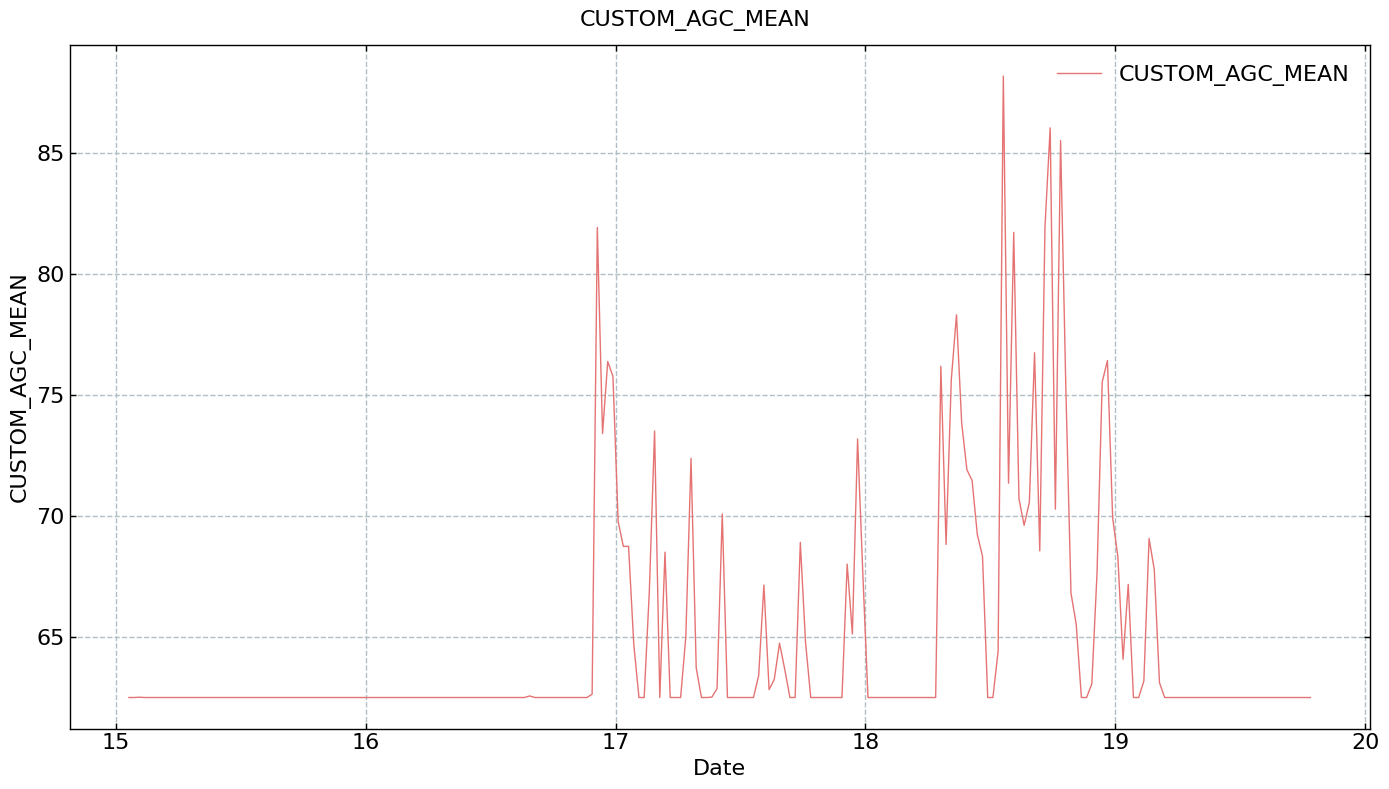

In [8]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)



Removing FC flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
CUSTOM_AGC_MEAN rejected 0 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing low signal fluxes: 189
Available values of FC after removing low signal fluxes: 189

Removing all newly generated columns relating to quality check (not needed for FLUXNET), restoring original set of variables ...


Removing LE flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_LE_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good v

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

### Plot affected variables

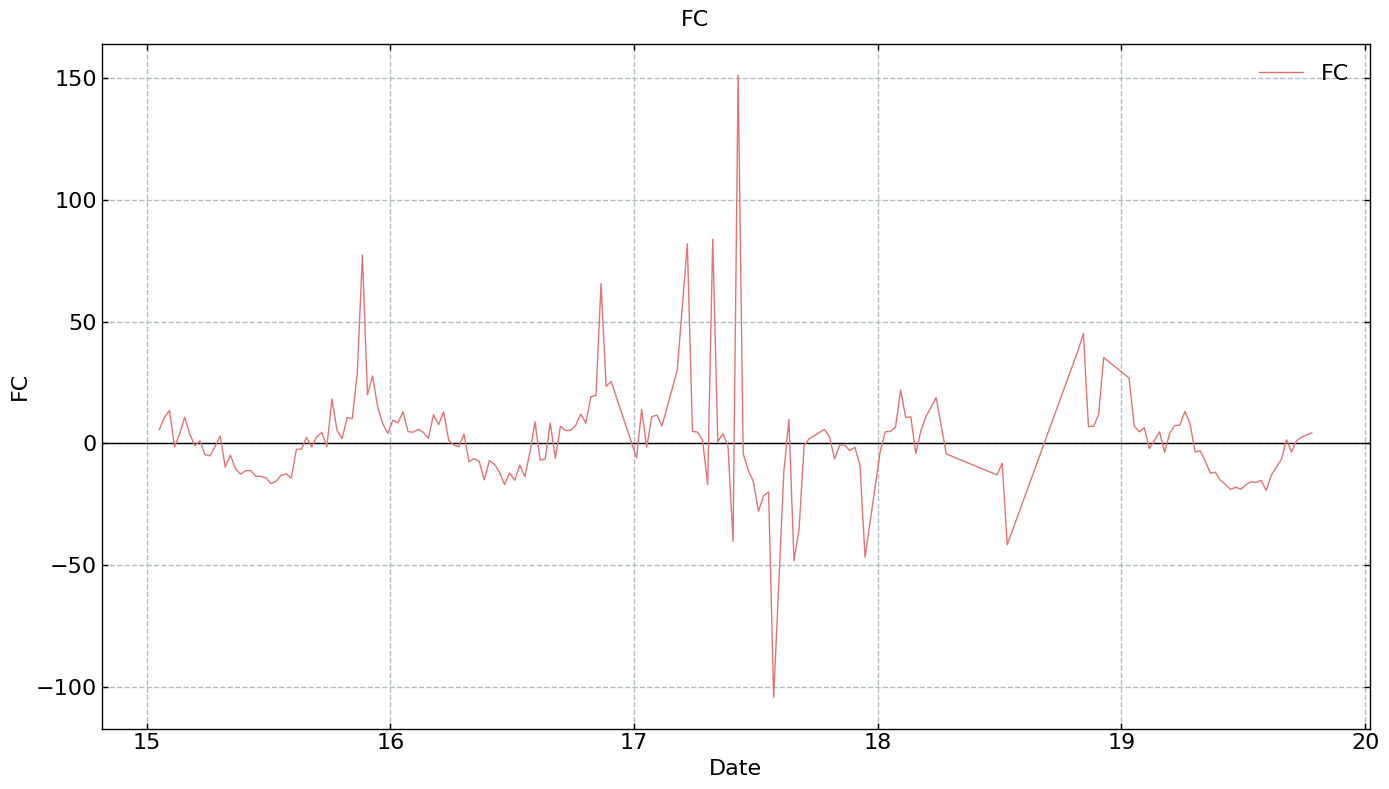

In [10]:
VAR = ['FC']
for v in VAR:
    # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
    TimeSeries(series=fxn.merged_df[v]).plot()

In [11]:
# These variables are erroneous during the defined time period
VAR = ['FC', 'LE']  
REMOVE_DATES = [    
    ['2024-08-17', '2024-08-18'],
    # ['2017-06-12 18:00', '2017-06-16 11:00']
]


Removing FC data points for the following date(s) and/or time range(s):
    REMOVING data for FC time range between ['2024-08-17', '2024-08-18'] (dates are inclusive)
[ManualRemoval]  running ManualRemoval ...
Manual removal rejected 48 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing fluxes: 189
Available values of FC after removing fluxes: 149

Removing LE data points for the following date(s) and/or time range(s):
    REMOVING data for LE time range between ['2024-08-17', '2024-08-18'] (dates are inclusive)
[ManualRemoval]  running ManualRemoval ...
Manual removal rejected 48 values of LE, all rejected value were removed from the dataset.

Available values of LE before removing fluxes: 222
Available values of LE after removing fluxes: 174


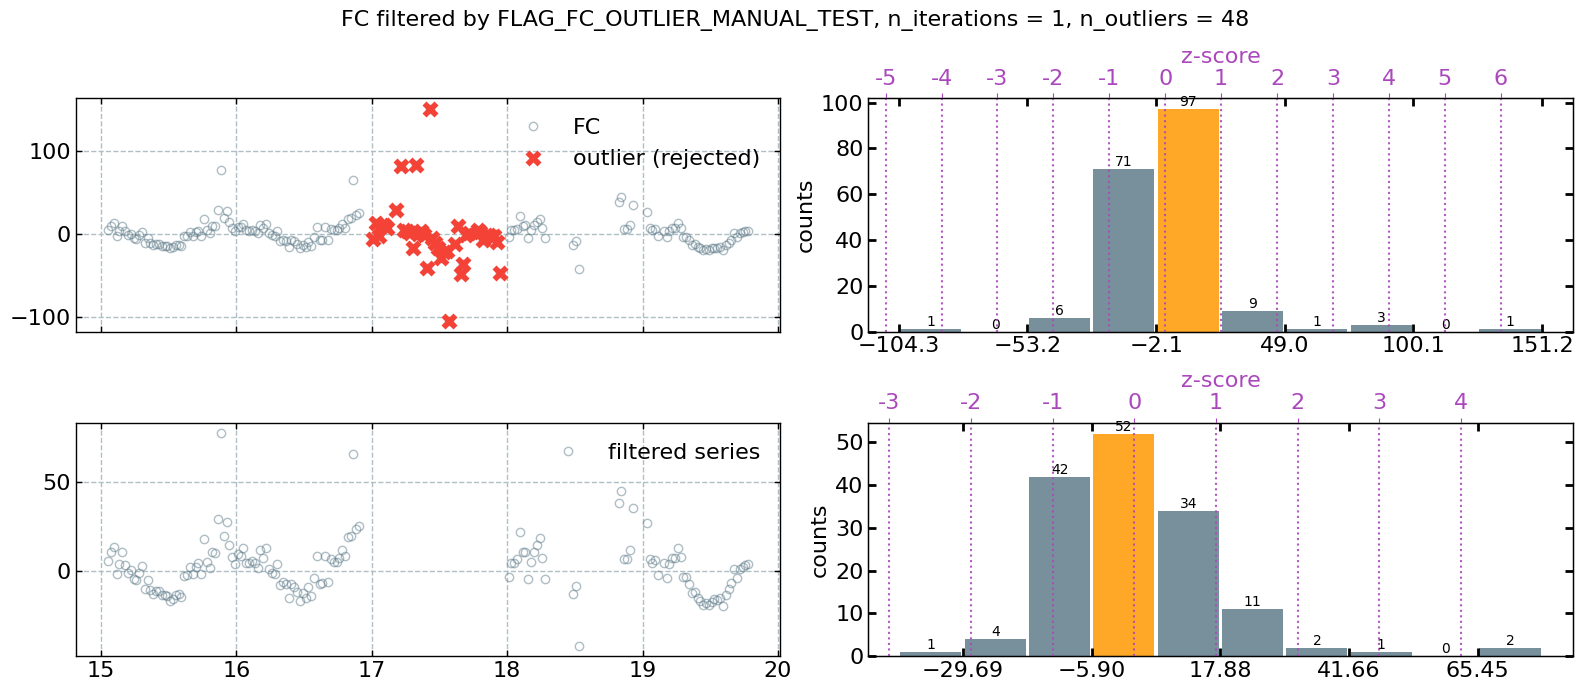

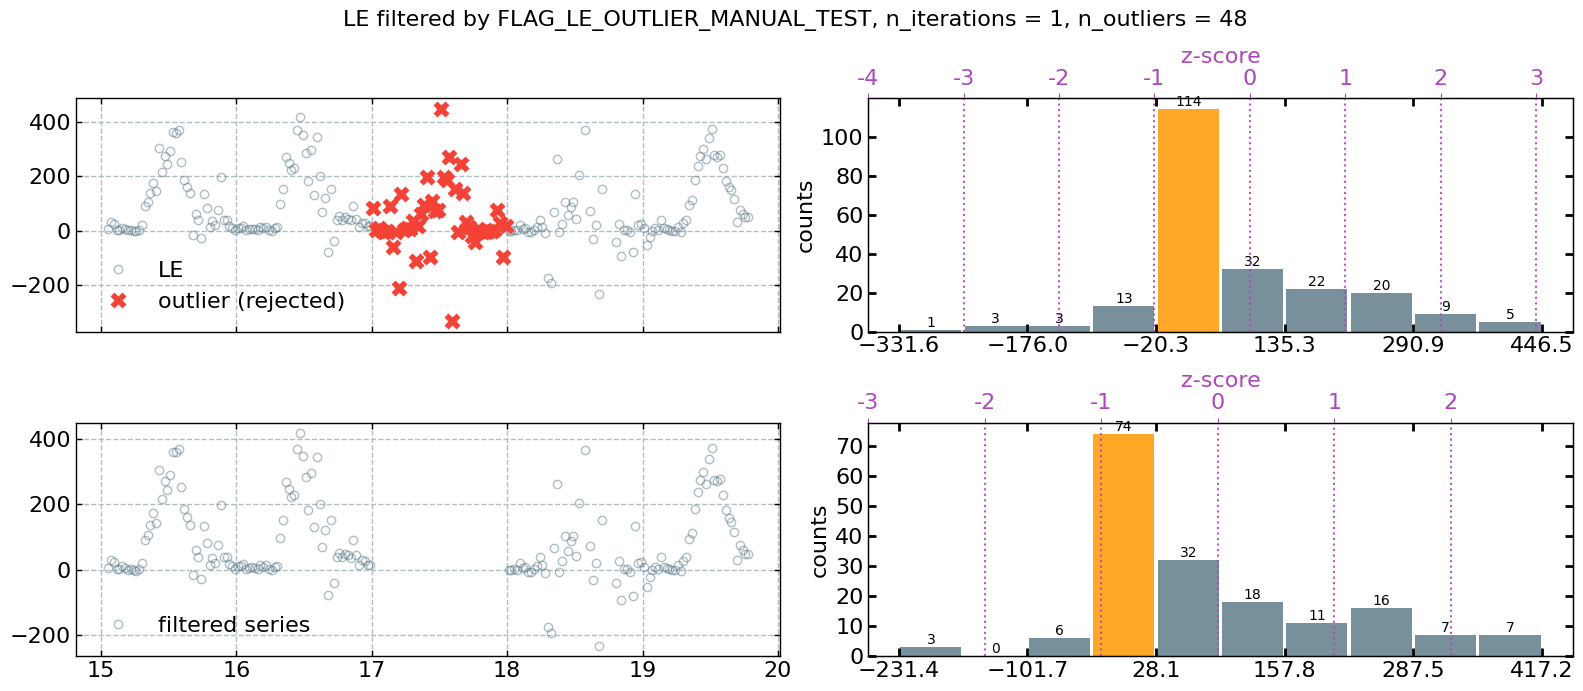

In [12]:
for v in VAR:
    fxn.remove_erroneous_data(var=v,
                              remove_dates=REMOVE_DATES,
                              showplot=True)

## Format data for FLUXNET

In [13]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
    Found: ['FC', 'FC_SSITC_TEST', 'SC_SINGLE', 'CO2', 'LE', 'LE_SSITC_TEST', 'SLE_SINGLE', 'H2O', 'H', 'H_SSITC_TEST', 'SH_SINGLE', 'USTAR', 'WD', 'WS', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']
    Not found: ['SW_IN_1_1_1', 'TA_1_1_1', 'RH_1_1_1', 'PA_1_1_1', 'LW_IN_1_1_1', 'PPFD_IN_1_1_1', 'G_1_1_1', 'NETRAD_1_1_1', 'TS_1_1_1', 'P_1_1_1', 'SWC_1_1_1']

Setting all missing values to -9999 ...

The following variables are renamed to comply with FLUXNET variable codes:
    RENAMED --> SC_SINGLE was renamed to SC
    RENAMED --> SLE_SINGLE was renamed to SLE
    RENAMED --> SH_SINGLE was renamed to SH

The following variables have been renamed:
    RENAMED --> FC was renamed to FC_1_1_1
    RENAMED --> FC_SSITC_TEST was renamed to FC_SSITC_TEST_1_1_1
    RENAMED --> SC was renamed to SC_1_1_1
    RENAMED --> CO2 was renamed to CO2_1_1_1
    RENAMED --> LE was renamed to LE_1_1_1
    RENAMED --> LE_SSITC_TEST was renamed to LE_SSITC_TEST_1_1_1
    RENAMED 

## Save yearly `CSV` files

In [14]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\TMP\CH-FRU_2024_fluxes_meteo_20250124.csv.


</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [15]:
data_fluxnet = fxn.get_data()
data_fluxnet

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,FC_SSITC_TEST_1_1_1,SC_1_1_1,CO2_1_1_1,LE_1_1_1,LE_SSITC_TEST_1_1_1,SLE_1_1_1,H2O_1_1_1,H_1_1_1,H_SSITC_TEST_1_1_1,SH_1_1_1,USTAR_1_1_1,WD_1_1_1,WS_1_1_1,FETCH_70_1_1_1,FETCH_90_1_1_1,FETCH_MAX_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,
2024-08-15 01:15:00,202408150100,202408150130,5.69079,1.0,-9999.000000,451.999,7.13024,1.0,-9999.000000,20.4113,-2.83356,0,-9999.000000,0.037061,225.18200,0.540338,-9999.0000,-9999.0000,-9999.0000
2024-08-15 01:45:00,202408150130,202408150200,10.65010,1.0,-0.603603,445.668,30.69610,1.0,-1.906370,19.9565,-2.05814,1,-0.123976,0.019153,215.81800,0.653046,-9999.0000,-9999.0000,-9999.0000
2024-08-15 02:15:00,202408150200,202408150230,13.55950,1.0,0.530299,451.225,23.71540,1.0,-0.538416,19.8283,-2.69514,0,-0.830269,0.034556,219.64900,0.613466,-9999.0000,-9999.0000,-9999.0000
2024-08-15 02:45:00,202408150230,202408150300,-1.40324,2.0,1.199800,463.791,2.07297,2.0,0.714907,19.9985,-1.87833,0,-0.429176,0.028195,205.42900,0.562104,-9999.0000,-9999.0000,-9999.0000
2024-08-15 03:15:00,202408150300,202408150330,3.93368,0.0,0.550325,469.554,4.11118,0.0,0.602364,20.1418,-3.69295,0,-0.196077,0.036870,215.09400,0.536065,-9999.0000,-9999.0000,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 16:45:00,202408191630,202408191700,-3.48481,2.0,0.115654,417.891,29.89260,2.0,0.547515,17.5428,-29.19850,1,-0.180189,0.291276,26.75550,0.508100,65.1979,97.6783,35.6600
2024-08-19 17:15:00,202408191700,202408191730,1.17102,0.0,0.244004,420.466,76.02150,0.0,0.975882,17.7775,-38.74750,0,-0.725407,0.318596,9.80180,0.695434,74.1926,111.1540,40.5797
2024-08-19 17:45:00,202408191730,202408191800,2.63225,0.0,0.131078,421.848,59.68730,0.0,0.609734,17.9240,-16.78720,0,-0.643870,0.293157,2.09964,0.578623,76.7951,115.0530,42.0031


In [16]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1']

## Overview of variables and some stats

In [17]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

,count,mean,std,min,25%,50%,75%,max
FC_1_1_1,228.0,-3463.275635,4769.469343,-9999.000000,-9999.000000,-9.318665,4.873915,77.339600
FC_SSITC_TEST_1_1_1,228.0,-1709.793860,3773.712775,-9999.000000,0.000000,0.000000,1.000000,2.000000
SC_1_1_1,228.0,-2192.834217,4146.363767,-9999.000000,-4.192660,-0.182028,0.242516,23.259000
CO2_1_1_1,228.0,-1340.677890,3941.915762,-9999.000000,414.735500,430.923000,452.699750,712.879000
LE_1_1_1,228.0,-2304.716843,4297.086847,-9999.000000,-113.256500,11.783550,98.434650,417.235000
LE_SSITC_TEST_1_1_1,228.0,-262.434211,1604.203539,-9999.000000,0.000000,1.000000,1.000000,2.000000
SLE_1_1_1,228.0,-438.471949,2052.162793,-9999.000000,-1.866005,-0.162424,1.800817,45.310800
H2O_1_1_1,228.0,-243.805533,1607.275425,-9999.000000,17.809825,20.381150,21.862700,24.798600
H_1_1_1,228.0,13.639623,33.468806,-54.882300,-3.486827,0.011490,24.286950,109.966000
H_SSITC_TEST_1_1_1,228.0,0.745614,0.706314,0.000000,0.000000,1.000000,1.000000,2.000000


## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

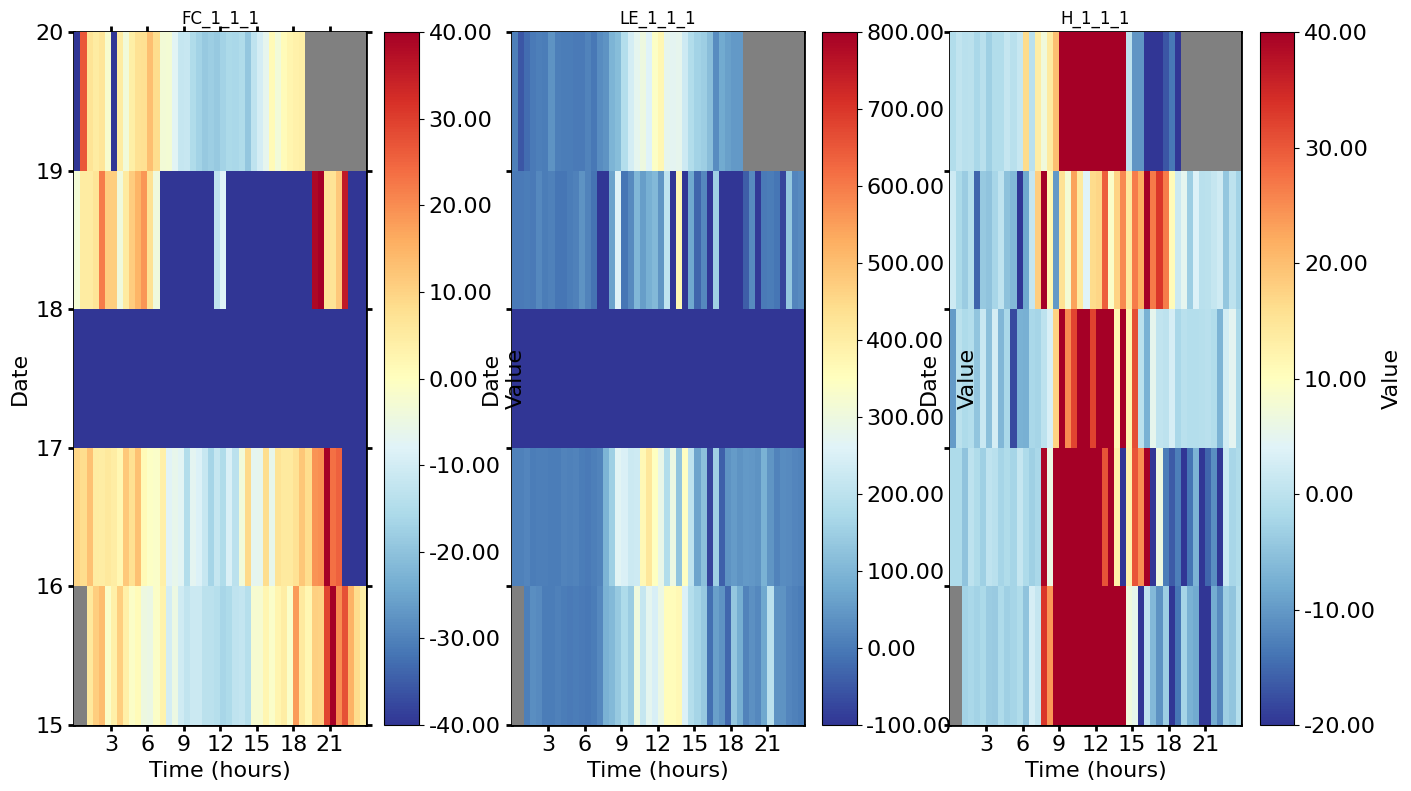

In [18]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['H_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("H_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

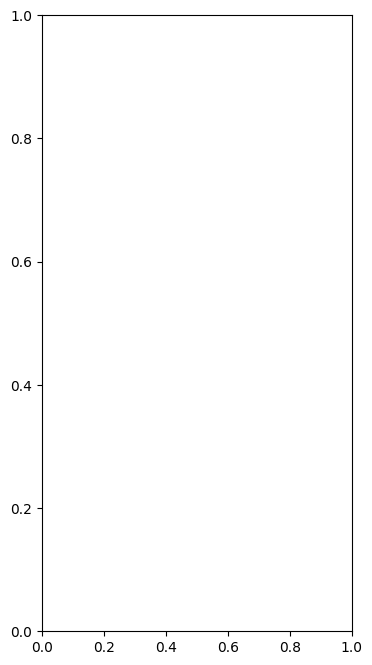

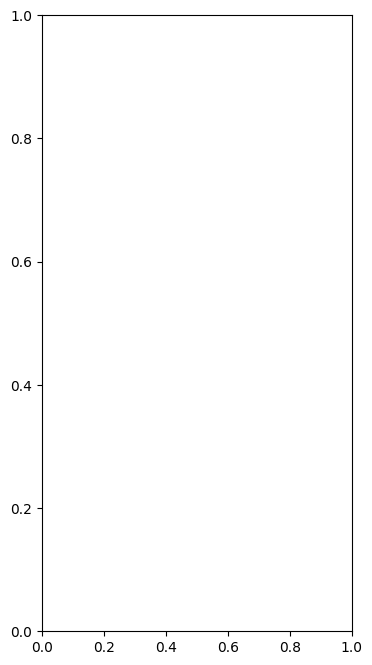

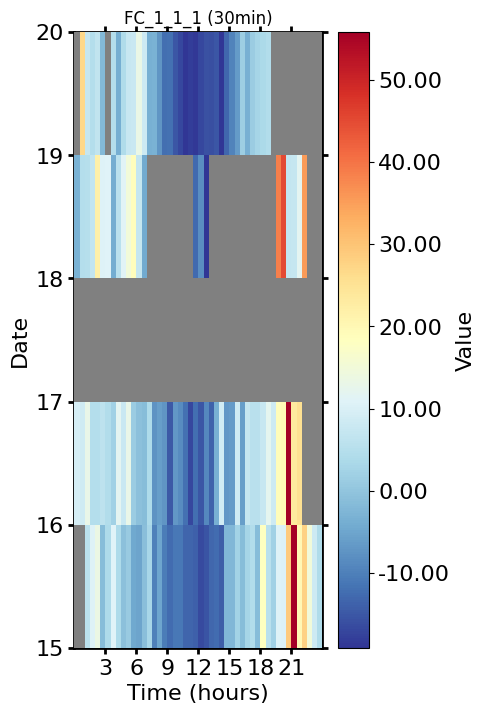

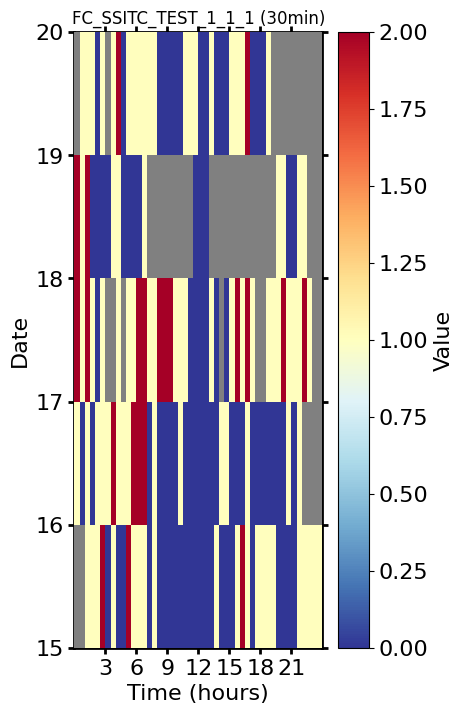

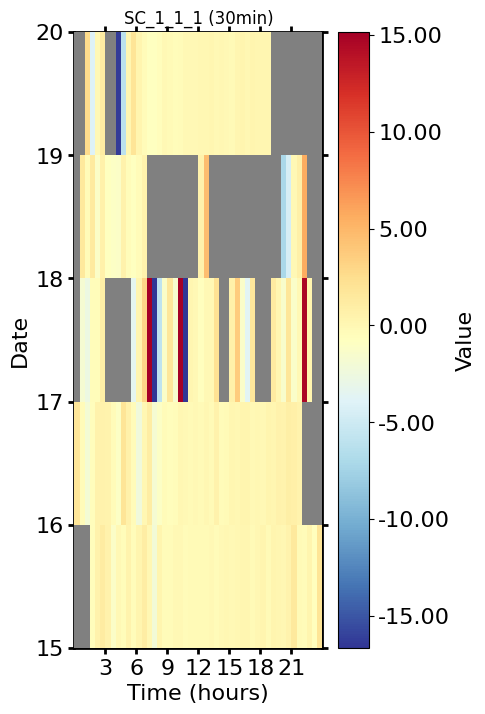

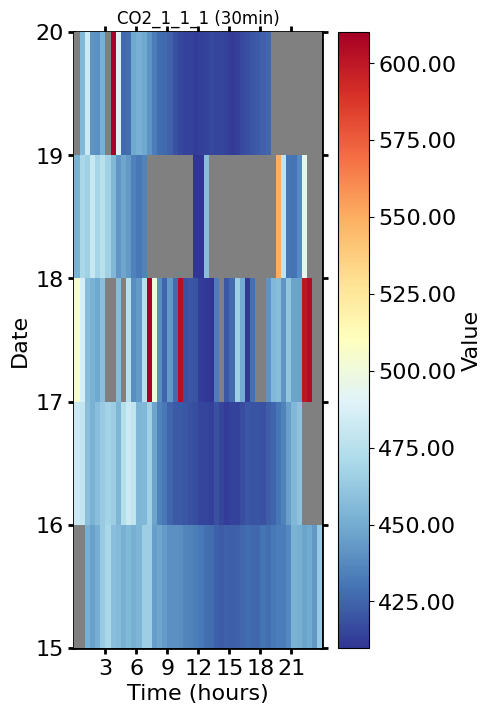

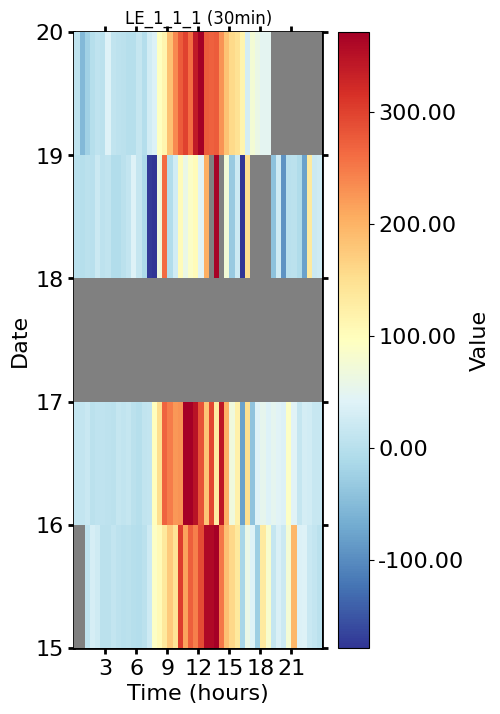

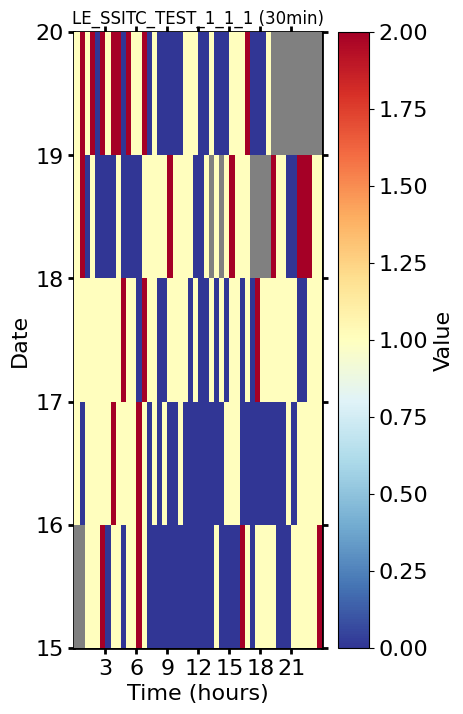

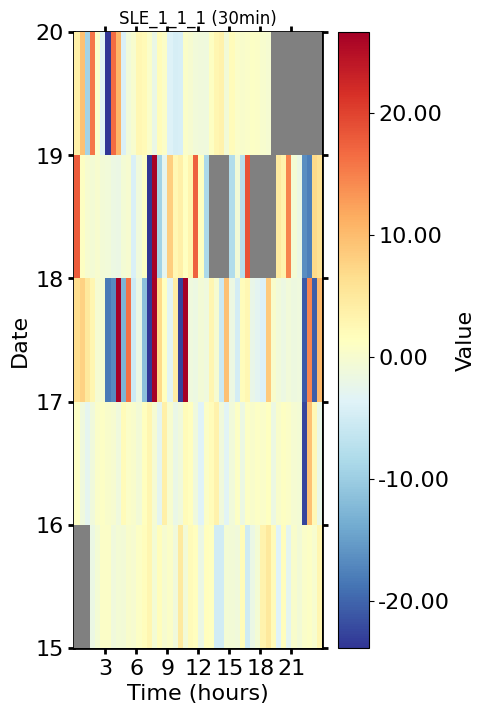

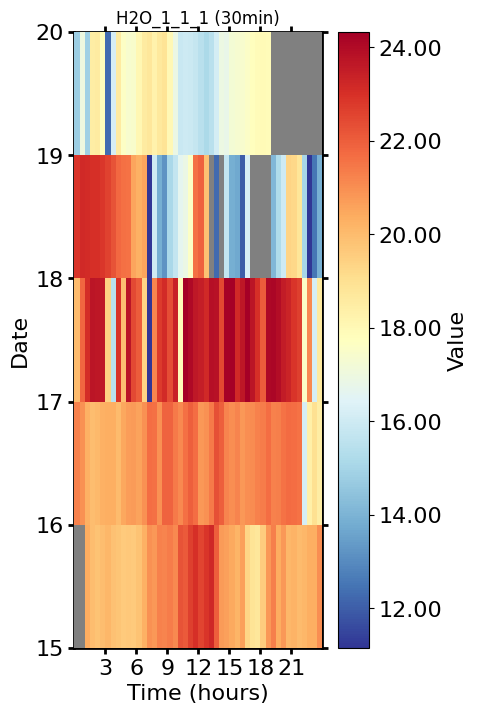

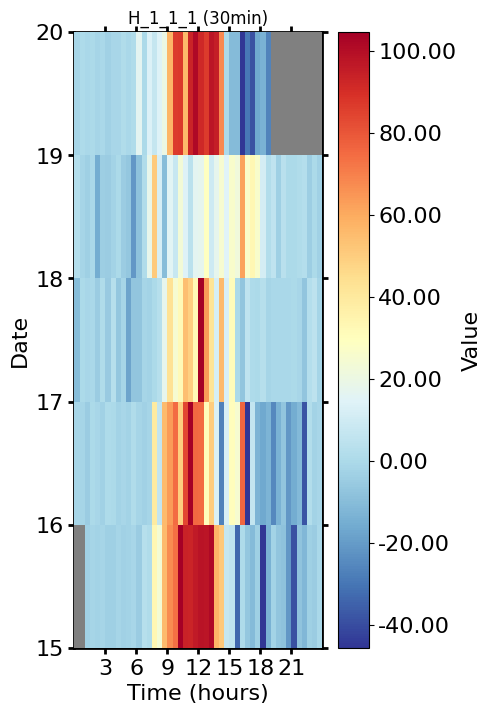

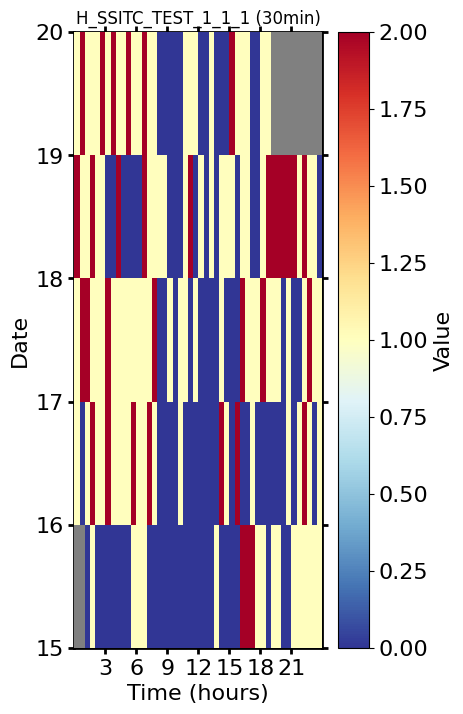

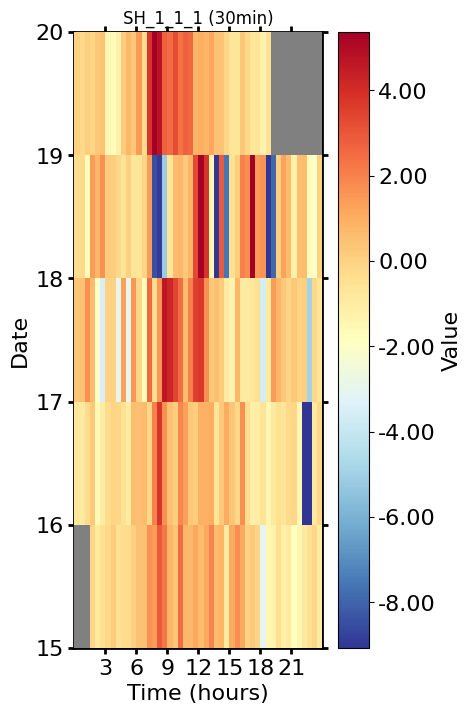

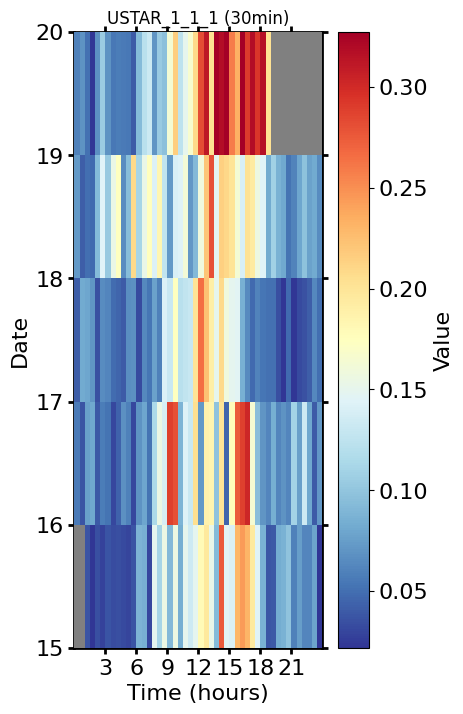

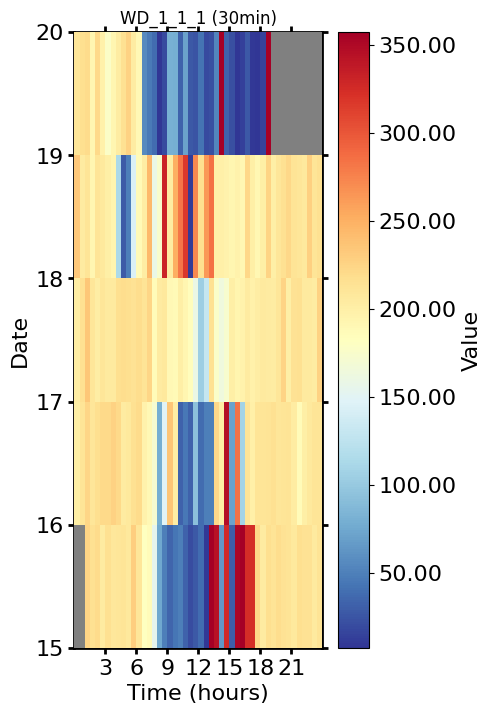

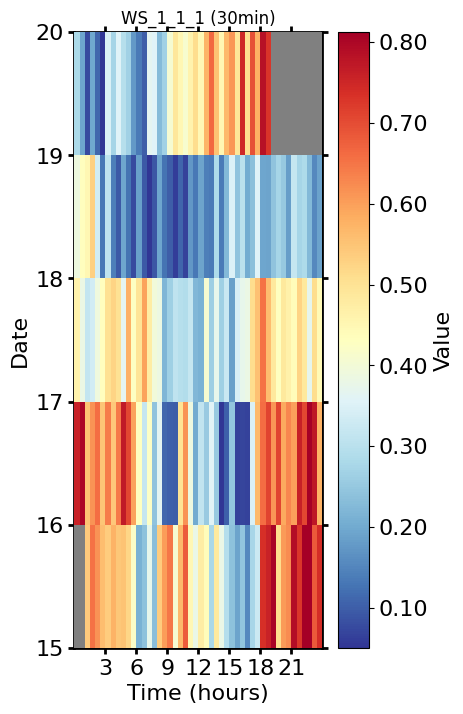

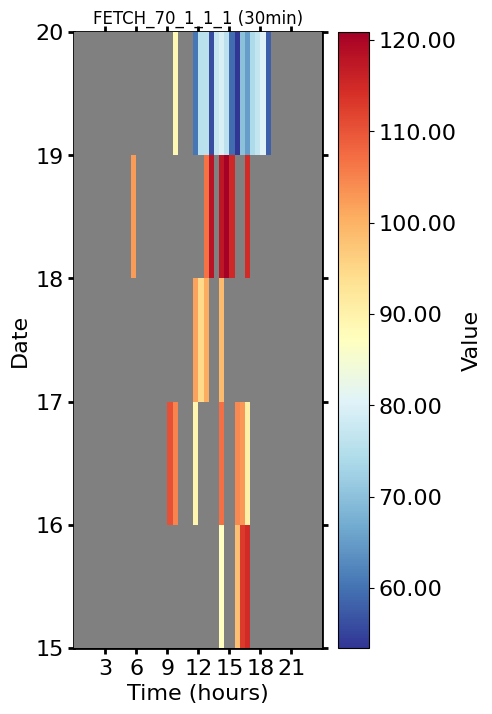

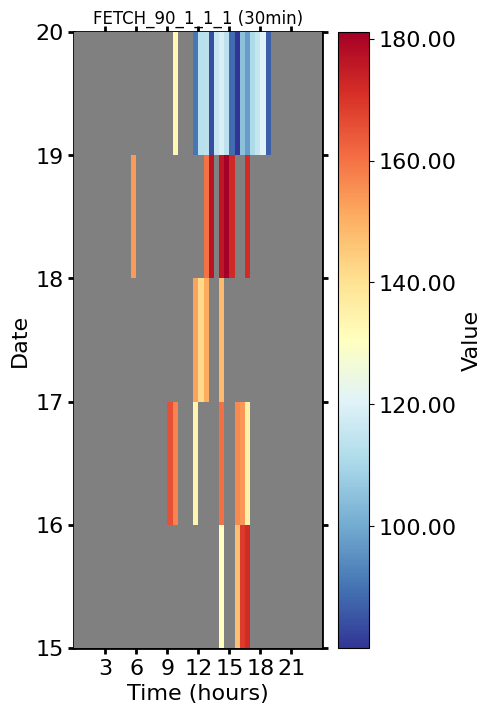

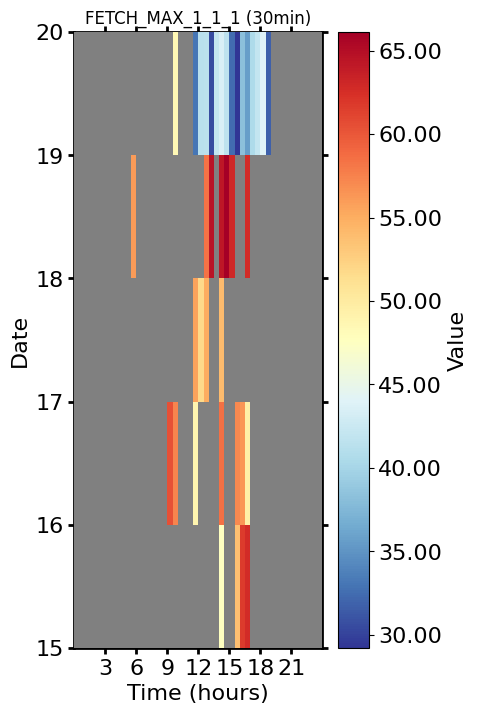

In [19]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()
    except TypeError:
        pass

</br>

# **End of notebook**

In [20]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-24 22:17:07
